In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score

from sklearn import linear_model, svm, gaussian_process
from sklearn.linear_model import ElasticNet, Lasso, LassoLars, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks,RandomUnderSampler,NearMiss

## Load Data

In [2]:
df_train = pd.read_csv("df_train.csv",encoding = "utf8") 
df_test = pd.read_csv("df_test.csv",encoding = "utf8") 

In [3]:
df_train=df_train[df_train.BROWSE_CNT>0]

In [4]:
df_train.NEXT_CC_APPLY.value_counts()

0.0    56808
1.0     1851
Name: NEXT_CC_APPLY, dtype: int64

In [5]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58659 entries, 5 to 187678
Columns: 156 entries, CUST_NO to CUST_YEAR_WM_P
dtypes: float64(153), int64(1), object(2)
memory usage: 70.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 156 entries, CUST_NO to CUST_YEAR_WM_P
dtypes: float64(153), int64(1), object(2)
memory usage: 35.7+ MB


(None, None)

In [6]:
CM_CUST=['CUST_NO','D90_TXN_CNT',# 'CUST_YEAR',
       'BROWSE_CNT','BROWSE_URL','BROWSE_DATE_LAST_DAYS','BROWSE_DATE_FIRST_DAYS',
       'PAGE_OFTEN_CAT_3','PAGE_OFTEN_CAT_5','PAGE_OFTEN_CAT_9','PAGE_OFTEN_CAT_11','PAGE_OFTEN_CAT_14','PAGE_OFTEN_CAT_19',
       'PAGE_OFTEN_CAT_21','PAGE_OFTEN_CAT_23','PAGE_OFTEN_CAT_25','PAGE_OFTEN_CAT_35','PAGE_OFTEN_CAT_69',
       'PAGE_OFTEN_CAT_135','PAGE_OFTEN_CAT_155','PAGE_OFTEN_CAT_177','PAGE_OFTEN_CAT_192','PAGE_OFTEN_CAT_196',
       'PAGE_OFTEN_CAT_210','PAGE_OFTEN_CAT_223', 'PAGE_OFTEN_CAT_252','PAGE_OFTEN_CAT_257',
       'PAGE_OFTEN_CAT_259','PAGE_OFTEN_CAT_261','PAGE_OFTEN_CAT_999',
       'GENDER_CODE_F', 'GENDER_CODE_M','GENDER_CODE_999','AGE_1', 'AGE_2','AGE_3', 'AGE_4', 
       'CHILDREN_CNT_0.0', 'CHILDREN_CNT_1.0','CHILDREN_CNT_2.0', 'CHILDREN_CNT_3.0', 'CHILDREN_CNT_4.0',
       'CHILDREN_CNT_5.0', 'CHILDREN_CNT_6.0', 'CHILDREN_CNT_9.0','CHILDREN_CNT_10.0', 'CHILDREN_CNT_999.0',
       'EDU_CODE_1.0', 'EDU_CODE_2.0', 'EDU_CODE_3.0','EDU_CODE_4.0', 'EDU_CODE_5.0', 'EDU_CODE_6.0', 'EDU_CODE_999.0',
       'INCOME_RANGE_CODE_1.0','INCOME_RANGE_CODE_2.0', 'INCOME_RANGE_CODE_3.0','INCOME_RANGE_CODE_4.0', 'INCOME_RANGE_CODE_999.0',
       'WORK_MTHS_1.0', 'WORK_MTHS_2.0','WORK_MTHS_3.0', 'WORK_MTHS_4.0', 'WORK_MTHS_5.0','WORK_MTHS_999.0',
       'GENDER_LN','AGE_LN','CHILDREN_LN','EDU_CODE_LN','INCOME_RANGE_LN','WORK_MTHS_LN',
       'GENDER_CC','AGE_CC','CHILDREN_CC','EDU_CODE_CC','INCOME_RANGE_CC','WORK_MTHS_CC',
       'GENDER_FX','AGE_FX','CHILDREN_FX','EDU_CODE_FX','INCOME_RANGE_FX','WORK_MTHS_FX',
       'GENDER_WM','AGE_WM','CHILDREN_WM','EDU_CODE_WM','INCOME_RANGE_WM','WORK_MTHS_WM']

In [7]:
CM_CC = ['D0_CC_LAST_DAYS_P','D90_CC_CNT','CUST_YEAR_CC_P', 'D0_CC_LAST_DAYS',
         'CC_DAY_INTERVAL_LAST','CC_DAY_INTERVAL_FIRST','CC_DAY_INTERVAL_AVG'] 

In [8]:
Y=df_train[['NEXT_CC_APPLY']].copy().fillna(0)

In [9]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58659 entries, 5 to 187678
Columns: 156 entries, CUST_NO to CUST_YEAR_WM_P
dtypes: float64(153), int64(1), object(2)
memory usage: 70.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 156 entries, CUST_NO to CUST_YEAR_WM_P
dtypes: float64(153), int64(1), object(2)
memory usage: 35.7+ MB


(None, None)

In [10]:
train=df_train[CM_CUST+CM_CC].copy()
test=df_test[CM_CUST+CM_CC].copy()

In [11]:
train['BROWSE_DATE_LAST_DAYS']=train['BROWSE_DATE_LAST_DAYS'].fillna(999)
train['BROWSE_DATE_FIRST_DAYS']=train['BROWSE_DATE_FIRST_DAYS'].fillna(999)
train['CC_DAY_INTERVAL_FIRST']=train['CC_DAY_INTERVAL_FIRST'].fillna(999)
train['CC_DAY_INTERVAL_LAST']=train['CC_DAY_INTERVAL_LAST'].fillna(999)
train['CC_DAY_INTERVAL_AVG']=train['CC_DAY_INTERVAL_AVG'].fillna(999)

In [12]:
test['BROWSE_DATE_LAST_DAYS']=test['BROWSE_DATE_LAST_DAYS'].fillna(999)
test['BROWSE_DATE_FIRST_DAYS']=test['BROWSE_DATE_FIRST_DAYS'].fillna(999)
test['CC_DAY_INTERVAL_FIRST']=test['CC_DAY_INTERVAL_FIRST'].fillna(999)
test['CC_DAY_INTERVAL_LAST']=test['CC_DAY_INTERVAL_LAST'].fillna(999)
test['CC_DAY_INTERVAL_AVG']=test['CC_DAY_INTERVAL_AVG'].fillna(999)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58659 entries, 5 to 187678
Data columns (total 95 columns):
CUST_NO                    58659 non-null object
D90_TXN_CNT                58659 non-null float64
BROWSE_CNT                 58659 non-null float64
BROWSE_URL                 58659 non-null float64
BROWSE_DATE_LAST_DAYS      58659 non-null float64
BROWSE_DATE_FIRST_DAYS     58659 non-null float64
PAGE_OFTEN_CAT_3           58659 non-null float64
PAGE_OFTEN_CAT_5           58659 non-null float64
PAGE_OFTEN_CAT_9           58659 non-null float64
PAGE_OFTEN_CAT_11          58659 non-null float64
PAGE_OFTEN_CAT_14          58659 non-null float64
PAGE_OFTEN_CAT_19          58659 non-null float64
PAGE_OFTEN_CAT_21          58659 non-null float64
PAGE_OFTEN_CAT_23          58659 non-null float64
PAGE_OFTEN_CAT_25          58659 non-null float64
PAGE_OFTEN_CAT_35          58659 non-null float64
PAGE_OFTEN_CAT_69          58659 non-null float64
PAGE_OFTEN_CAT_135         58659 non-null

In [14]:
train=train.fillna(0)
test=test.fillna(0)

In [15]:
df_train.NEXT_CC_APPLY.value_counts()

0.0    56808
1.0     1851
Name: NEXT_CC_APPLY, dtype: int64

In [16]:
train=train.drop(['CUST_NO'], axis=1)
test=test.drop(['CUST_NO'], axis=1)

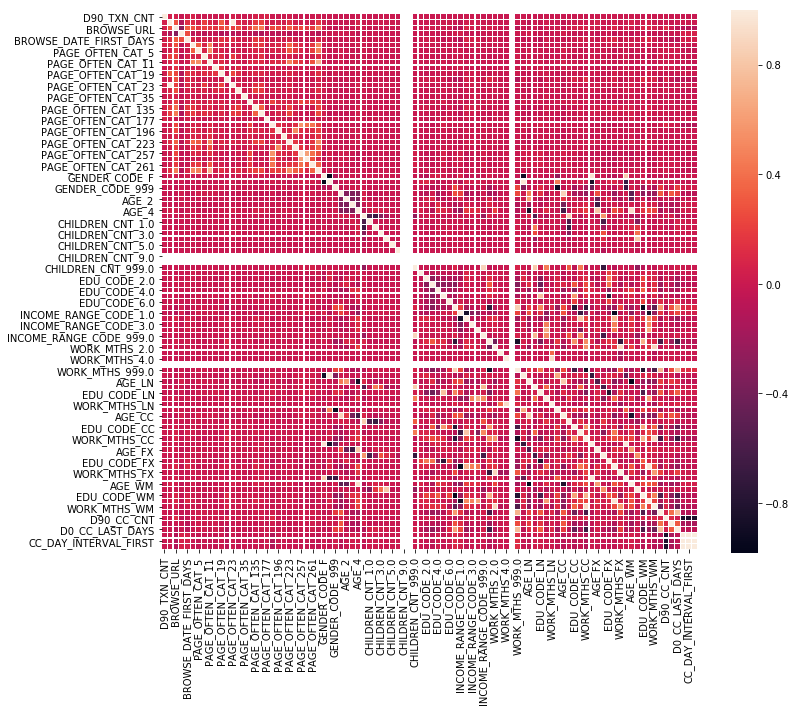

In [17]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, linewidths=0.1, vmax=1.0, square=True)

In [18]:
def correlation(col_corr, threshold):
    #col_corr = delcols#set() # Set of all the names of deleted columns
    corr_matrix = train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
                if colname in train.columns:
                    del train[colname] # deleting the column from the dataset
                if colname in test.columns:
                    del test[colname] # deleting the column from the dataset

    print(col_corr)
    delcols=col_corr
    #print(dataset)

In [19]:
delcols=[]
correlation(delcols,0.95)

['PAGE_OFTEN_CAT_23', 'GENDER_LN', 'GENDER_WM', 'INCOME_RANGE_WM', 'CC_DAY_INTERVAL_FIRST', 'CC_DAY_INTERVAL_AVG', 'CC_DAY_INTERVAL_AVG']


In [20]:
delcols

['PAGE_OFTEN_CAT_23',
 'GENDER_LN',
 'GENDER_WM',
 'INCOME_RANGE_WM',
 'CC_DAY_INTERVAL_FIRST',
 'CC_DAY_INTERVAL_AVG',
 'CC_DAY_INTERVAL_AVG']

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 88 columns):
D90_TXN_CNT                30000 non-null float64
BROWSE_CNT                 30000 non-null float64
BROWSE_URL                 30000 non-null float64
BROWSE_DATE_LAST_DAYS      30000 non-null float64
BROWSE_DATE_FIRST_DAYS     30000 non-null float64
PAGE_OFTEN_CAT_3           30000 non-null float64
PAGE_OFTEN_CAT_5           30000 non-null float64
PAGE_OFTEN_CAT_9           30000 non-null float64
PAGE_OFTEN_CAT_11          30000 non-null float64
PAGE_OFTEN_CAT_14          30000 non-null float64
PAGE_OFTEN_CAT_19          30000 non-null float64
PAGE_OFTEN_CAT_21          30000 non-null float64
PAGE_OFTEN_CAT_25          30000 non-null float64
PAGE_OFTEN_CAT_35          30000 non-null float64
PAGE_OFTEN_CAT_69          30000 non-null float64
PAGE_OFTEN_CAT_135         30000 non-null float64
PAGE_OFTEN_CAT_155         30000 non-null float64
PAGE_OFTEN_CAT_177         30000 non-null

In [22]:
kf=KFold(n_splits=5, random_state=42, shuffle=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train,Y, test_size=0.3, random_state=42)

In [24]:
gdbc=GradientBoostingClassifier(learning_rate=0.1, random_state=42,n_estimators=100)
gdbc.fit(X_train, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [25]:
print("R Square:",gdbc.score(X_test, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gdbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gdbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gdbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gdbc.predict(X_test)))

R Square: 0.9701670644391408
ROC AUC score: 0.7122447298028982
F1 Square: 0.03669724770642202
recall: 0.01890359168241966
precision: 0.625


In [26]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
test_std=sc.fit_transform(test)

In [27]:
lr= LogisticRegression(penalty='l1',C=1, random_state=42)
lr.fit(X_train_std, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
print("R Square:",lr.score(X_test_std, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,lr.predict_proba(X_test_std)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,lr.predict(X_test_std)))
print("recall:",metrics.recall_score(y_test,lr.predict(X_test_std)))
print("precision:",metrics.precision_score(y_test,lr.predict(X_test_std)))

R Square: 0.9699397658824866
ROC AUC score: 0.6573506664432509
F1 Square: 0.0
recall: 0.0
precision: 0.0


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
lgbc = lgb.LGBMClassifier(learning_rate=0.5,n_estimators=100,max_depth=3,random_state=42)

In [30]:
lgbc.fit(X_train, y_train) 

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [31]:
print("R Square:",lgbc.score(X_test, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,lgbc.predict(X_test)))

R Square: 0.9688032730992158
ROC AUC score: 0.6718430509061353
F1 Square: 0.11594202898550725
recall: 0.06805293005671077
precision: 0.391304347826087


In [32]:
print("R Square:",lgbc.score(X_test, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,lgbc.predict(X_test)))

R Square: 0.9688032730992158
ROC AUC score: 0.6718430509061353
F1 Square: 0.11594202898550725
recall: 0.06805293005671077
precision: 0.391304347826087


In [33]:
params = {'learning_rate':[0.5],'n_estimators':[100,200],'scale_pos_weight':[1]}
gs_lgbc = GridSearchCV(estimator=lgbc, param_grid=params, cv=kf, verbose=1, scoring='f1') 
eval_set  = [(X_train , y_train) , (X_test , y_test)]
gs_lgbc.fit(X_train ,  y_train ,eval_set=eval_set,early_stopping_rounds=5,eval_metric='auc')#eval_metric='auc',

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vect

[1]	valid_0's auc: 0.634736	valid_1's auc: 0.623975
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.65696	valid_1's auc: 0.649833
[3]	valid_0's auc: 0.680848	valid_1's auc: 0.676889
[4]	valid_0's auc: 0.683792	valid_1's auc: 0.676476
[5]	valid_0's auc: 0.695843	valid_1's auc: 0.67784
[6]	valid_0's auc: 0.701626	valid_1's auc: 0.683577
[7]	valid_0's auc: 0.717848	valid_1's auc: 0.699572
[8]	valid_0's auc: 0.723519	valid_1's auc: 0.70134
[9]	valid_0's auc: 0.727258	valid_1's auc: 0.703115
[10]	valid_0's auc: 0.730696	valid_1's auc: 0.704698
[11]	valid_0's auc: 0.734194	valid_1's auc: 0.703999
[12]	valid_0's auc: 0.736675	valid_1's auc: 0.698118
[13]	valid_0's auc: 0.737929	valid_1's auc: 0.699243
[14]	valid_0's auc: 0.739993	valid_1's auc: 0.696745
[15]	valid_0's auc: 0.74067	valid_1's auc: 0.696591
Early stopping, best iteration is:
[10]	valid_0's auc: 0.730696	valid_1's auc: 0.704698


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.632733	valid_1's auc: 0.61913
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.646146	valid_1's auc: 0.626022
[3]	valid_0's auc: 0.685123	valid_1's auc: 0.675165
[4]	valid_0's auc: 0.697147	valid_1's auc: 0.687367
[5]	valid_0's auc: 0.711145	valid_1's auc: 0.686647
[6]	valid_0's auc: 0.718173	valid_1's auc: 0.691159
[7]	valid_0's auc: 0.72097	valid_1's auc: 0.685817
[8]	valid_0's auc: 0.724032	valid_1's auc: 0.683618
[9]	valid_0's auc: 0.72622	valid_1's auc: 0.682649
[10]	valid_0's auc: 0.729212	valid_1's auc: 0.682044
[11]	valid_0's auc: 0.731754	valid_1's auc: 0.682002
Early stopping, best iteration is:
[6]	valid_0's auc: 0.718173	valid_1's auc: 0.691159


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.636938	valid_1's auc: 0.620123
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.66292	valid_1's auc: 0.654974
[3]	valid_0's auc: 0.674269	valid_1's auc: 0.662256
[4]	valid_0's auc: 0.696407	valid_1's auc: 0.667532
[5]	valid_0's auc: 0.704622	valid_1's auc: 0.681291
[6]	valid_0's auc: 0.711223	valid_1's auc: 0.680467
[7]	valid_0's auc: 0.721569	valid_1's auc: 0.692229
[8]	valid_0's auc: 0.724851	valid_1's auc: 0.689365
[9]	valid_0's auc: 0.728189	valid_1's auc: 0.68981
[10]	valid_0's auc: 0.731191	valid_1's auc: 0.685149
[11]	valid_0's auc: 0.73443	valid_1's auc: 0.68327
[12]	valid_0's auc: 0.739561	valid_1's auc: 0.68471
Early stopping, best iteration is:
[7]	valid_0's auc: 0.721569	valid_1's auc: 0.692229


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.621108	valid_1's auc: 0.610778
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.639192	valid_1's auc: 0.619147
[3]	valid_0's auc: 0.658544	valid_1's auc: 0.630923
[4]	valid_0's auc: 0.680416	valid_1's auc: 0.63858
[5]	valid_0's auc: 0.706879	valid_1's auc: 0.679182
[6]	valid_0's auc: 0.713582	valid_1's auc: 0.681551
[7]	valid_0's auc: 0.718918	valid_1's auc: 0.683741
[8]	valid_0's auc: 0.72372	valid_1's auc: 0.69035
[9]	valid_0's auc: 0.730816	valid_1's auc: 0.693571
[10]	valid_0's auc: 0.732836	valid_1's auc: 0.693495
[11]	valid_0's auc: 0.736859	valid_1's auc: 0.694225
[12]	valid_0's auc: 0.739396	valid_1's auc: 0.693237
[13]	valid_0's auc: 0.740791	valid_1's auc: 0.694577
[14]	valid_0's auc: 0.741411	valid_1's auc: 0.693749
[15]	valid_0's auc: 0.742701	valid_1's auc: 0.691589
[16]	valid_0's auc: 0.746097	valid_1's auc: 0.689849
[17]	valid_0's auc: 0.749058	valid_1's auc: 0.691992
[18]	valid_0's auc: 0.751824	valid_1's auc: 0.6916

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.636484	valid_1's auc: 0.616218
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.669121	valid_1's auc: 0.653783
[3]	valid_0's auc: 0.688278	valid_1's auc: 0.676875
[4]	valid_0's auc: 0.696189	valid_1's auc: 0.687478
[5]	valid_0's auc: 0.705989	valid_1's auc: 0.687508
[6]	valid_0's auc: 0.712919	valid_1's auc: 0.692959
[7]	valid_0's auc: 0.716397	valid_1's auc: 0.695697
[8]	valid_0's auc: 0.719687	valid_1's auc: 0.692258
[9]	valid_0's auc: 0.724008	valid_1's auc: 0.692309
[10]	valid_0's auc: 0.727814	valid_1's auc: 0.693449
[11]	valid_0's auc: 0.729602	valid_1's auc: 0.694301
[12]	valid_0's auc: 0.732931	valid_1's auc: 0.692772
Early stopping, best iteration is:
[7]	valid_0's auc: 0.716397	valid_1's auc: 0.695697


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.634736	valid_1's auc: 0.623975
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.65696	valid_1's auc: 0.649833
[3]	valid_0's auc: 0.680848	valid_1's auc: 0.676889
[4]	valid_0's auc: 0.683792	valid_1's auc: 0.676476
[5]	valid_0's auc: 0.695843	valid_1's auc: 0.67784
[6]	valid_0's auc: 0.701626	valid_1's auc: 0.683577
[7]	valid_0's auc: 0.717848	valid_1's auc: 0.699572
[8]	valid_0's auc: 0.723519	valid_1's auc: 0.70134
[9]	valid_0's auc: 0.727258	valid_1's auc: 0.703115
[10]	valid_0's auc: 0.730696	valid_1's auc: 0.704698
[11]	valid_0's auc: 0.734194	valid_1's auc: 0.703999
[12]	valid_0's auc: 0.736675	valid_1's auc: 0.698118
[13]	valid_0's auc: 0.737929	valid_1's auc: 0.699243
[14]	valid_0's auc: 0.739993	valid_1's auc: 0.696745
[15]	valid_0's auc: 0.74067	valid_1's auc: 0.696591
Early stopping, best iteration is:
[10]	valid_0's auc: 0.730696	valid_1's auc: 0.704698


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.632733	valid_1's auc: 0.61913
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.646146	valid_1's auc: 0.626022
[3]	valid_0's auc: 0.685123	valid_1's auc: 0.675165
[4]	valid_0's auc: 0.697147	valid_1's auc: 0.687367
[5]	valid_0's auc: 0.711145	valid_1's auc: 0.686647
[6]	valid_0's auc: 0.718173	valid_1's auc: 0.691159
[7]	valid_0's auc: 0.72097	valid_1's auc: 0.685817
[8]	valid_0's auc: 0.724032	valid_1's auc: 0.683618
[9]	valid_0's auc: 0.72622	valid_1's auc: 0.682649
[10]	valid_0's auc: 0.729212	valid_1's auc: 0.682044
[11]	valid_0's auc: 0.731754	valid_1's auc: 0.682002
Early stopping, best iteration is:
[6]	valid_0's auc: 0.718173	valid_1's auc: 0.691159


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.636938	valid_1's auc: 0.620123
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.66292	valid_1's auc: 0.654974
[3]	valid_0's auc: 0.674269	valid_1's auc: 0.662256
[4]	valid_0's auc: 0.696407	valid_1's auc: 0.667532
[5]	valid_0's auc: 0.704622	valid_1's auc: 0.681291
[6]	valid_0's auc: 0.711223	valid_1's auc: 0.680467
[7]	valid_0's auc: 0.721569	valid_1's auc: 0.692229
[8]	valid_0's auc: 0.724851	valid_1's auc: 0.689365
[9]	valid_0's auc: 0.728189	valid_1's auc: 0.68981
[10]	valid_0's auc: 0.731191	valid_1's auc: 0.685149
[11]	valid_0's auc: 0.73443	valid_1's auc: 0.68327
[12]	valid_0's auc: 0.739561	valid_1's auc: 0.68471
Early stopping, best iteration is:
[7]	valid_0's auc: 0.721569	valid_1's auc: 0.692229


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.621108	valid_1's auc: 0.610778
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.639192	valid_1's auc: 0.619147
[3]	valid_0's auc: 0.658544	valid_1's auc: 0.630923
[4]	valid_0's auc: 0.680416	valid_1's auc: 0.63858
[5]	valid_0's auc: 0.706879	valid_1's auc: 0.679182
[6]	valid_0's auc: 0.713582	valid_1's auc: 0.681551
[7]	valid_0's auc: 0.718918	valid_1's auc: 0.683741
[8]	valid_0's auc: 0.72372	valid_1's auc: 0.69035
[9]	valid_0's auc: 0.730816	valid_1's auc: 0.693571
[10]	valid_0's auc: 0.732836	valid_1's auc: 0.693495
[11]	valid_0's auc: 0.736859	valid_1's auc: 0.694225
[12]	valid_0's auc: 0.739396	valid_1's auc: 0.693237
[13]	valid_0's auc: 0.740791	valid_1's auc: 0.694577
[14]	valid_0's auc: 0.741411	valid_1's auc: 0.693749
[15]	valid_0's auc: 0.742701	valid_1's auc: 0.691589
[16]	valid_0's auc: 0.746097	valid_1's auc: 0.689849
[17]	valid_0's auc: 0.749058	valid_1's auc: 0.691992
[18]	valid_0's auc: 0.751824	valid_1's auc: 0.6916

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.636484	valid_1's auc: 0.616218
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.669121	valid_1's auc: 0.653783
[3]	valid_0's auc: 0.688278	valid_1's auc: 0.676875
[4]	valid_0's auc: 0.696189	valid_1's auc: 0.687478
[5]	valid_0's auc: 0.705989	valid_1's auc: 0.687508
[6]	valid_0's auc: 0.712919	valid_1's auc: 0.692959
[7]	valid_0's auc: 0.716397	valid_1's auc: 0.695697
[8]	valid_0's auc: 0.719687	valid_1's auc: 0.692258
[9]	valid_0's auc: 0.724008	valid_1's auc: 0.692309
[10]	valid_0's auc: 0.727814	valid_1's auc: 0.693449
[11]	valid_0's auc: 0.729602	valid_1's auc: 0.694301
[12]	valid_0's auc: 0.732931	valid_1's auc: 0.692772
Early stopping, best iteration is:
[7]	valid_0's auc: 0.716397	valid_1's auc: 0.695697


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.3s finished
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.637155	valid_1's auc: 0.616953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.666884	valid_1's auc: 0.654634
[3]	valid_0's auc: 0.692256	valid_1's auc: 0.68928
[4]	valid_0's auc: 0.707249	valid_1's auc: 0.69764
[5]	valid_0's auc: 0.716216	valid_1's auc: 0.700217
[6]	valid_0's auc: 0.719486	valid_1's auc: 0.701558
[7]	valid_0's auc: 0.722343	valid_1's auc: 0.700536
[8]	valid_0's auc: 0.724522	valid_1's auc: 0.700407
[9]	valid_0's auc: 0.72813	valid_1's auc: 0.701285
[10]	valid_0's auc: 0.733984	valid_1's auc: 0.697669
[11]	valid_0's auc: 0.735868	valid_1's auc: 0.695902
Early stopping, best iteration is:
[6]	valid_0's auc: 0.719486	valid_1's auc: 0.701558


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.5], 'n_estimators': [100, 200], 'scale_pos_weight': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [34]:
gs_lgbc.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=3, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
print("R Square:",metrics.accuracy_score(y_test, gs_lgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_lgbc.predict(X_test)))

R Square: 0.9702238890783044
ROC AUC score: 0.7015575943786927
F1 Square: 0.054151624548736454
recall: 0.02835538752362949
precision: 0.6


In [36]:
xgbc = xgb.XGBClassifier(learning_rate=1, n_estimators=100,random_state=42, max_depth=5,tree_method='gpu_hist')
eval_set  = [(X_train , y_train) , (X_test , y_test)]
xgbc.fit(X_train ,  y_train ,eval_set=eval_set,early_stopping_rounds=5,eval_metric='auc')#eval_metric='auc',

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[0]	validation_0-auc:0.659271	validation_1-auc:0.648675
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.714641	validation_1-auc:0.691424
[2]	validation_0-auc:0.734041	validation_1-auc:0.695382
[3]	validation_0-auc:0.75351	validation_1-auc:0.667086
[4]	validation_0-auc:0.771497	validation_1-auc:0.674556
[5]	validation_0-auc:0.782883	validation_1-auc:0.669321
[6]	validation_0-auc:0.78715	validation_1-auc:0.667025
[7]	validation_0-auc:0.792258	validation_1-auc:0.663608
Stopping. Best iteration:
[2]	validation_0-auc:0.734041	validation_1-auc:0.695382



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist')

In [37]:
print("R Square:",metrics.accuracy_score(y_test, xgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,xgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,xgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,xgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,xgbc.predict(X_test)))

R Square: 0.9705648369132857
ROC AUC score: 0.6953821700667624
F1 Square: 0.08156028368794327
recall: 0.043478260869565216
precision: 0.6571428571428571


In [38]:
params = {'learning_rate':[0.5,1],'n_estimators':[100,200],'scale_pos_weight':[1]}
gs_xgbc = GridSearchCV(estimator=xgbc, param_grid=params, cv=kf,n_jobs=-1,verbose=1, scoring='f1') 
eval_set  = [(X_train , y_train) , (X_test , y_test)]
gs_xgbc.fit(X_train ,  y_train ,eval_set=eval_set,early_stopping_rounds=5,eval_metric='auc')#eval_metric='auc',

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    9.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.3s finished
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0]	validation_0-auc:0.659271	validation_1-auc:0.648675
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.714641	validation_1-auc:0.691424
[2]	validation_0-auc:0.734041	validation_1-auc:0.695382
[3]	validation_0-auc:0.75351	validation_1-auc:0.667086
[4]	validation_0-auc:0.771497	validation_1-auc:0.674556
[5]	validation_0-auc:0.782883	validation_1-auc:0.669321
[6]	validation_0-auc:0.78715	validation_1-auc:0.667025
[7]	validation_0-auc:0.792258	validation_1-auc:0.663608
Stopping. Best iteration:
[2]	validation_0-auc:0.734041	validation_1-auc:0.695382



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.5, 1], 'n_estimators': [100, 200], 'scale_pos_weight': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [39]:
gs_xgbc.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist')

In [40]:
print("R Square:",metrics.accuracy_score(y_test, gs_xgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_xgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_xgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_xgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_xgbc.predict(X_test)))

R Square: 0.9705648369132857
ROC AUC score: 0.6953821700667624
F1 Square: 0.08156028368794327
recall: 0.043478260869565216
precision: 0.6571428571428571


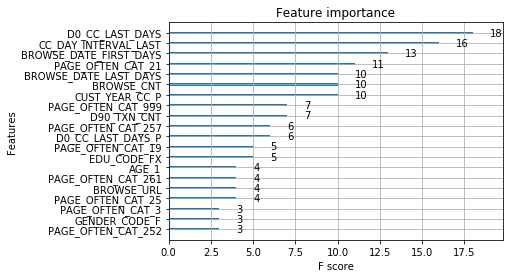

In [41]:
from xgboost import plot_importance
plot_importance(xgbc,max_num_features=20)
plt.show()

In [42]:
clf = RandomForestClassifier(n_estimators=100)
params = {'class_weight':[{0:1, 1:pos_weight} for pos_weight in np.arange(1, 2,1)]}
gs_rfx = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring='f1') 
gs_rfx.fit(X_train, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 1, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [43]:
gs_rfx.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [44]:
print("R Square:",metrics.accuracy_score(y_test, gs_rfx.best_estimator_.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_rfx.best_estimator_.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_rfx.best_estimator_.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_rfx.best_estimator_.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_rfx.best_estimator_.predict(X_test)))

R Square: 0.9708489601091033
ROC AUC score: 0.6613867698779811
F1 Square: 0.08228980322003578
recall: 0.043478260869565216
precision: 0.7666666666666667


In [45]:
from vecstack import stacking

In [46]:
# Initialize 1st level estimators
models = [gdbc,gs_xgbc.best_estimator_,gs_lgbc.best_estimator_,gs_rfx.best_estimator_,lr]

S_X_train, S_X_test = stacking(models, X_train, y_train, X_test, regression = False, 
                               metric = metrics.log_loss, n_folds = 4,needs_proba=True,stratified = True, shuffle = True, 
                               random_state = 42, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [GradientBoostingClassifier]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    fold  0:  [0.13324257]
    fold  1:  [0.13261242]
    fold  2:  [0.13124180]
    fold  3:  [0.12826465]
    ----
    MEAN:     [0.13134036] + [0.00191743]
    FULL:     [0.13134051]

model  1:     [XGBClassifier]
    fold  0:  [0.19732199]
    fold  1:  [0.18699652]
    fold  2:  [0.19680479]
    fold  3:  [0.19250725]
    ----
    MEAN:     [0.19340764] + [0.00414656]
    FULL:     [0.19340760]

model  2:     [LGBMClassifier]
    fold  0:  [0.14144626]
    fold  1:  [0.14048340]
    fold  2:  [0.13844076]
    fold  3:  [0.14027697]
    ----
    MEAN:     [0.14016185] + [0.00108726]
    FULL:     [0.14016188]

model  3:     [RandomForestClassifier]
    fold  0:  [0.25364224]
    fold  1:  [0.25156655]
    fold  2:  [0.24037334]
    fold  3:  [0.22170606]
    ----
    MEAN:     [0.24182205] + [0.01266317]
    FULL:     [0.24182306]

model  4:     [LogisticRegression]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.13980970]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.13681201]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.13704404]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.13490875]
    ----
    MEAN:     [0.13714362] + [0.00174803]
    FULL:     [0.13714374]



In [47]:
S_X_train.shape,S_X_test.shape,

((41061, 10), (17598, 10))

In [48]:
# Initialize 2nd level model
model = LogisticRegression(penalty='l1',C=0.5, random_state=42)
    
# Fit 2nd level model
model = model.fit(S_X_train, y_train)

# Predict
y_pred = model.predict(S_X_test)
y_pred_proba = model.predict_proba(S_X_test)[:,1]

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
print("R Square:",metrics.accuracy_score(y_test, model.predict(S_X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,model.predict_proba(S_X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,model.predict(S_X_test)))
print("recall:",metrics.recall_score(y_test,model.predict(S_X_test)))
print("precision:",metrics.precision_score(y_test,model.predict(S_X_test)))

R Square: 0.9708489601091033
ROC AUC score: 0.7040974357276222
F1 Square: 0.10471204188481675
recall: 0.05671077504725898
precision: 0.6818181818181818


In [50]:
y_test.sum(), y_test.shape

(NEXT_CC_APPLY    529.0
 dtype: float64, (17598, 1))

In [52]:
y_pred.sum(),y_pred_proba.sum()

(44.0, 556.5620625835295)

In [54]:
predict_stack = pd.DataFrame(y_pred_proba, columns=['CC_IND_P'])

In [69]:
# Use trial and error, found 0.091 is the best threshold to max F1-score
predict_stack['CC_IND']=np.where(predict_stack.CC_IND_P>0.091,1,0)
predict_stack['CC_IND'].value_counts()

0    17340
1      258
Name: CC_IND, dtype: int64

In [70]:
# find max F1-score is 0.206 > default threshold F1-score 0.105
print("R Square:",metrics.accuracy_score(y_test, predict_stack['CC_IND']))
print("ROC AUC score:",metrics.roc_auc_score(y_test,predict_stack['CC_IND_P']))
print("F1 Square:",metrics.f1_score(y_test,predict_stack['CC_IND']))
print("recall:",metrics.recall_score(y_test,predict_stack['CC_IND']))
print("precision:",metrics.precision_score(y_test,predict_stack['CC_IND']))

R Square: 0.9644846005227867
ROC AUC score: 0.7040974357276222
F1 Square: 0.20584498094027953
recall: 0.15311909262759923
precision: 0.313953488372093


In [58]:
# Initialize 1st level estimators
models = [gdbc,gs_xgbc.best_estimator_,gs_lgbc.best_estimator_,gs_rfx.best_estimator_,lr]

S_train, S_test = stacking(models, train, Y, test, regression = False, 
                               metric = metrics.log_loss, n_folds = 4,needs_proba=True,stratified = True, shuffle = True, 
                               random_state = 42, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [GradientBoostingClassifier]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    fold  0:  [0.12769764]
    fold  1:  [0.12889492]
    fold  2:  [0.12888525]
    fold  3:  [0.12834189]
    ----
    MEAN:     [0.12845492] + [0.00049118]
    FULL:     [0.12845493]

model  1:     [XGBClassifier]
    fold  0:  [0.17856513]
    fold  1:  [0.18137374]
    fold  2:  [0.18421944]
    fold  3:  [0.18050162]
    ----
    MEAN:     [0.18116498] + [0.00203547]
    FULL:     [0.18116499]

model  2:     [LGBMClassifier]
    fold  0:  [0.13285795]
    fold  1:  [0.13415366]
    fold  2:  [0.13531505]
    fold  3:  [0.13576613]
    ----
    MEAN:     [0.13452320] + [0.00112711]
    FULL:     [0.13452318]

model  3:     [RandomForestClassifier]
    fold  0:  [0.24326075]
    fold  1:  [0.23422419]
    fold  2:  [0.27571223]
    fold  3:  [0.24196808]
    ----
    MEAN:     [0.24879131] + [0.01592232]
    FULL:     [0.24879143]

model  4:     [LogisticRegression]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.13303332]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.13252424]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.13457919]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.13532657]
    ----
    MEAN:     [0.13386583] + [0.00113309]
    FULL:     [0.13386580]



In [59]:
# Initialize 2nd level model
model2 = LogisticRegression(penalty='l1',C=0.5, random_state=42)

# Fit 2nd level model
model2 = model2.fit(S_train, Y)

# Predict
y_pred2 = model2.predict(S_test)
y_pred2_proba = model2.predict_proba(S_test)[:,1]

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
y_pred2.sum(),y_pred2_proba.sum()

(113.0, 1058.2077113061787)

In [61]:
y_pred2_proba

array([0.02470382, 0.02040724, 0.02432869, ..., 0.02855467, 0.02674875,
       0.02596341])

In [62]:
predict_stack2 = pd.DataFrame(y_pred2_proba, columns=['CC_IND_P'])

In [71]:
predict_stack2['CC_IND']=np.where(predict_stack2.CC_IND_P>0.091,1,0)
predict_stack2['CC_IND'].value_counts()

0    29174
1      826
Name: CC_IND, dtype: int64

In [72]:
predict_stack2.to_csv('CC_result.csv', index=False)